#**4**.  **Arima (Autoregressive Integrated Moving Average)**

In [ ]:
# importing the required documents
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
ethereum = pd.read_csv('/content/drive/MyDrive/ETH_USD_2015-08-09_2021-08-11-CoinDesk.csv',index_col= 'Date')
print(ethereum.head(5)) 

           Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
Date                                      ...                               
2015-08-09      ETH             0.909046  ...        1.916540       0.794497
2015-08-10      ETH             0.692321  ...        0.909046       0.692321
2015-08-11      ETH             0.668067  ...        0.692321       0.654331
2015-08-12      ETH             0.850151  ...        1.148621       0.668067
2015-08-13      ETH             1.266023  ...        1.266023       0.850151

[5 rows x 5 columns]


In [ ]:
ethereum.rename(columns={'Closing Price (USD)': 'closing_price'}, inplace=True)
ethereum.rename(columns={'24h Open (USD)': 'open'}, inplace=True)
ethereum.rename(columns={'24h High (USD)': 'high'}, inplace=True)
ethereum.rename(columns={'24h Low (USD)': 'low'}, inplace=True)

In [ ]:
print (ethereum)

           Currency  closing_price         open         high          low
Date                                                                     
2015-08-09      ETH       0.909046     1.749289     1.916540     0.794497
2015-08-10      ETH       0.692321     0.909046     0.909046     0.692321
2015-08-11      ETH       0.668067     0.692321     0.692321     0.654331
2015-08-12      ETH       0.850151     0.668067     1.148621     0.668067
2015-08-13      ETH       1.266023     0.850151     1.266023     0.850151
...             ...            ...          ...          ...          ...
2021-08-07      ETH    2886.559482  2828.015082  2947.159717  2722.463440
2021-08-08      ETH    3103.687804  2891.141797  3173.789617  2865.920082
2021-08-09      ETH    3041.472727  3160.880302  3188.919204  2948.428968
2021-08-10      ETH    3128.803133  3012.367594  3186.421671  2894.994188
2021-08-11      ETH    3158.377197  3161.670926  3234.096363  3058.510323

[2162 rows x 5 columns]


In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

dftest = adfuller(ethereum["closing_price"], autolag="AIC") #autolag = Method to use when automatically determining the lag

dfoutput = pd.Series(dftest[0:4], index=["Test Stats", "p-value", "# Lags", "# of obs"])
for key, value in dftest[4].items():
    dfoutput[f"Critical Value ({key})"] = value
print(dfoutput)

Test Stats                 0.829289
p-value                    0.992095
# Lags                    24.000000
# of obs                2137.000000
Critical Value (1%)       -3.433414
Critical Value (5%)       -2.862893
Critical Value (10%)      -2.567491
dtype: float64


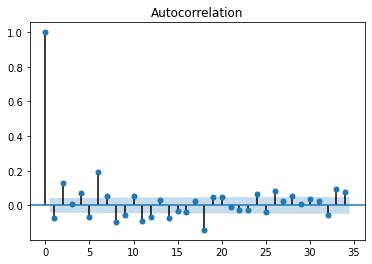

In [ ]:
ethereum["1st_diff"] = ethereum["closing_price"].diff()
ethereum["2nd_diff"] = ethereum["1st_diff"].diff()
from plotly.subplots import make_subplots
import statsmodels.api as sm
fig = make_subplots(rows=2, cols=1)

for idx, d in enumerate(["1st_diff", "2nd_diff"]):
    fig.add_trace(
        go.Scatter(
            name = d,
            x = ethereum.index,
            y = ethereum[d]
        ),
        row=idx+1,col=1
    )
fig.update_layout(
    title="Differnced plots"
)
fig.show()

sm.graphics.tsa.plot_acf(ethereum["1st_diff"].dropna());

In [ ]:
!pip install pmdarima
import pmdarima as pm


model = pm.auto_arima(ethereum.closing_price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22804.819, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22844.310, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22834.461, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22836.875, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22844.334, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22798.103, Time=1.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22802.892, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22798.625, Time=2.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22790.171, Time=1.72 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22803.862, Time=1.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22788.155, Time=3.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22705.627, Time=6.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22713.789, Time=4.45 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=22704.772, Time=3.19 sec
 ARIMA(2,1,3)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



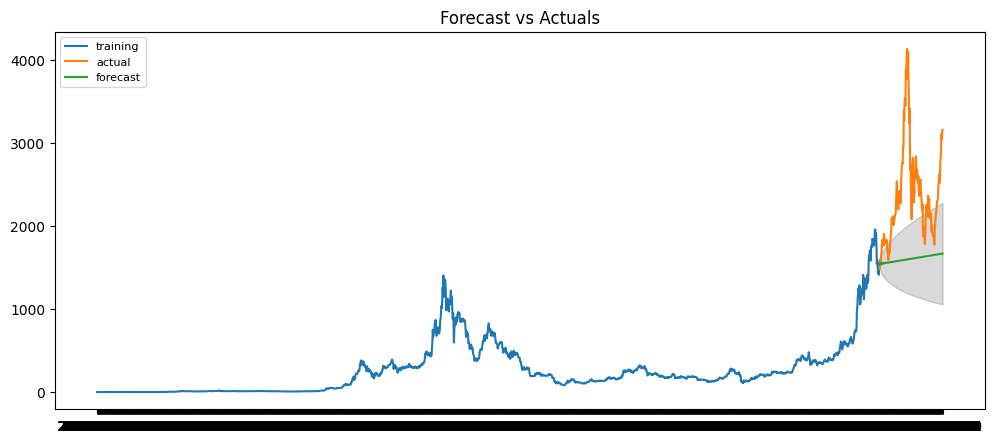

In [ ]:
train = ethereum.closing_price[:2000]
test  = ethereum.closing_price[2000:]
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
model = ARIMA(train, order=(3, 1, 3))
fit_model = model.fit(disp=-1)

fc, se, conf = fit_model.forecast(162, alpha=0.05)  # 95% conf

fc_series    = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                    color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# importing the required libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
#Evaluation for the Facebook Prophet
test_mae = mean_absolute_error(test, fc_series)
test_rmse = np.sqrt(mean_squared_error(test, fc_series))
test_r2 = r2_score(test, fc_series)
test_mse =mean_squared_error(test, fc_series)
print(f" Arima MAE : {test_mae}")
print(f" Arima R2 : {test_r2}")
print(f" Arima rmse : {test_rmse}")

 Arima MAE : 759.12299945941
 Arima R2 : -1.7290848051719525
 Arima : 945.4380363743313


In [ ]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [ ]:
test_mape = mean_absolute_percentage_error(test, fc_series )
print(f"Prophet's MAPE : {test_mape}")

Prophet's MAPE : 28.72510785752925
